In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def CONVERT_RGB_TO_MONOCHROME_BW(im_1,threshold=100):
    #im_1=plt.imread(image_1)
    im_2=np.zeros((im_1.shape[0],im_1.shape[1]))
    for i in range(im_1.shape[0]):
        for j in range(im_1.shape[1]):
            if(im_1[i,j,0]/3+im_1[i,j,1]/3+im_1[i,j,2]/3)>threshold:
                    im_2[i,j]=0
            else:
                    im_2[i,j]=1
            
    return im_2

def DEFINE_MASK_1():
    mask_1=[[1,1,1],[1,1,1],[1,1,1]]
    return mask_1

def DEFINE_MASK_2():
    mask_1=[[0,0,0],[0,0,0],[0,0,0]]
    return mask_1

def DILATION_EROSION(img_1,mask,morphologyOp='dilation'):
    m=img_1.shape[0]
    n=img_1.shape[1]
    img_2=np.random.randint(0,1,(m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x_1=img_1[i,j] == mask[1][1]
            
            x_2=img_1[i-1,j-1] ==  mask[0][0]
            x_3=img_1[i-1,j] ==  mask[0][1]
            x_4=img_1[i-1,j+1] ==  mask[0][2]
            
            x_5=img_1[i+1,j-1] ==  mask[2][0]
            x_6=img_1[i+1,j] ==  mask[2][1]
            x_7=img_1[i+1,j+1] ==  mask[2][2]
            
            x_8=img_1[i,j-1] ==  mask[1][0]
            x_9=img_1[i,j+1] == mask[1][2]
            
            if(morphologyOp == 'dilation'):
                
                result_1 = x_1 or x_2 or x_3 or x_4 or x_5
                result_2 = x_6 or x_7 or x_8 or x_9
                result = result_1 or result_2
                
            elif(morphologyOp == 'erosion'):
                
                result_1 = x_1 and x_2 and x_3 and x_4 and x_5
                result_2 = x_6 and x_7 and x_8 and x_9
                result = result_1 and result_2
                
            img_2[i,j]=result
    return img_2

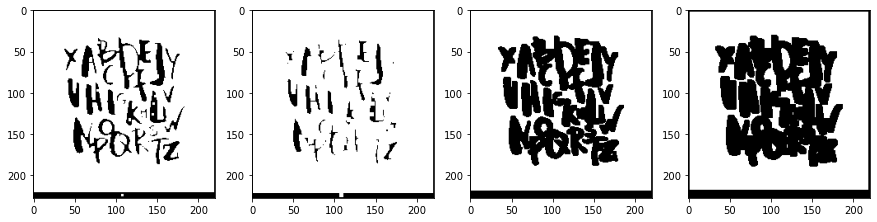

In [28]:
path=r'C:\\Users\\hakan\\Görüntü İşleme\\harfler.png'
img_orjinal=plt.imread(path)

img_convertbw=CONVERT_RGB_TO_MONOCHROME_BW(img_orjinal,0.5)
img_dilation=DILATION_EROSION(img_convertbw,DEFINE_MASK_1(),morphologyOp='dilation')
img_redilation=DILATION_EROSION(img_dilation,DEFINE_MASK_1(),morphologyOp='dilation')

img_erosion=DILATION_EROSION(img_convertbw,DEFINE_MASK_1(),morphologyOp='erosion')
img_reerosion=DILATION_EROSION(img_erosion,DEFINE_MASK_1(),morphologyOp='erosion')

plt.figure(figsize=(15,15))
plt.subplot(1,4,1),plt.imshow(img_dilation,cmap='gray')
plt.subplot(1,4,2),plt.imshow(img_redilation,cmap='gray')

plt.subplot(1,4,3),plt.imshow(img_erosion,cmap='gray')
plt.subplot(1,4,4),plt.imshow(img_reerosion,cmap='gray')
plt.show()

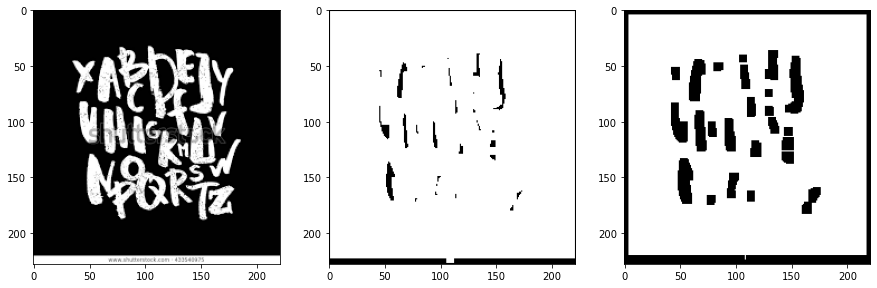

In [29]:
img_dilation=DILATION_EROSION(img_convertbw,DEFINE_MASK_1(),morphologyOp='dilation')         #closing operation
img_2xdilation=DILATION_EROSION(img_dilation,DEFINE_MASK_1(),morphologyOp='dilation')        #kapama işlemi
img_3xdilation=DILATION_EROSION(img_2xdilation,DEFINE_MASK_1(),morphologyOp='dilation')

img_erosion=DILATION_EROSION(img_3xdilation,DEFINE_MASK_1(),morphologyOp='erosion')
img_2xerosion=DILATION_EROSION(img_erosion,DEFINE_MASK_1(),morphologyOp='erosion')
img_3xerosion=DILATION_EROSION(img_2xerosion,DEFINE_MASK_1(),morphologyOp='erosion')

plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_orjinal,cmap='gray')
plt.subplot(1,3,2),plt.imshow(img_3xdilation,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_3xerosion,cmap='gray')
plt.show()

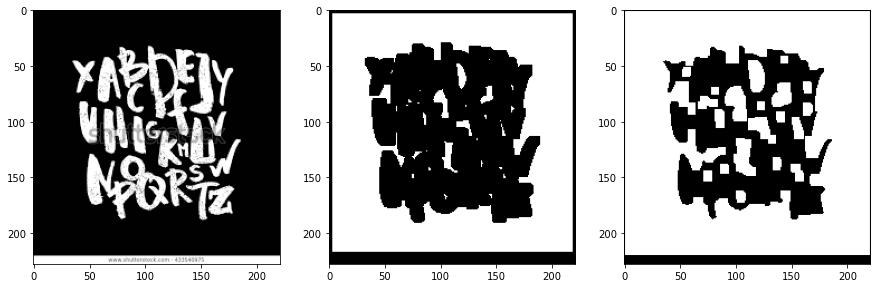

In [30]:
img_erosion=DILATION_EROSION(img_convertbw,DEFINE_MASK_1(),morphologyOp='erosion')           #opening operation
img_2xerosion=DILATION_EROSION(img_erosion,DEFINE_MASK_1(),morphologyOp='erosion')           #açma işlemi
img_3xerosion=DILATION_EROSION(img_2xerosion,DEFINE_MASK_1(),morphologyOp='erosion')

img_dilation=DILATION_EROSION(img_3xerosion,DEFINE_MASK_1(),morphologyOp='dilation')         
img_2xdilation=DILATION_EROSION(img_dilation,DEFINE_MASK_1(),morphologyOp='dilation')       
img_3xdilation=DILATION_EROSION(img_2xdilation,DEFINE_MASK_1(),morphologyOp='dilation')


plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img_orjinal,cmap='gray')
plt.subplot(1,3,2),plt.imshow(img_3xerosion,cmap='gray')
plt.subplot(1,3,3),plt.imshow(img_3xdilation,cmap='gray')
plt.show()